In [1]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [22]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def say_wealth(self):
        print(f"Hi, I am agent {self.unique_id!s} and I have {self.wealth} monies")

    def exchange(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # A step is the smallest unit of time in the model, also called a 'tick'
        # shuffle_do() psuedo-randomly reorders the list of agents and 
        # then calls the function passed as a paramter
        self.agents.shuffle_do("exchange")

    def show_status(self):
        """Show the state of each agent"""
        self.agents.do("say_wealth")

In [26]:
 # Create agents
model = MoneyModel(10)
model.show_status()

Hi, I am agent 1 and I have 1 monies
Hi, I am agent 2 and I have 1 monies
Hi, I am agent 3 and I have 1 monies
Hi, I am agent 4 and I have 1 monies
Hi, I am agent 5 and I have 1 monies
Hi, I am agent 6 and I have 1 monies
Hi, I am agent 7 and I have 1 monies
Hi, I am agent 8 and I have 1 monies
Hi, I am agent 9 and I have 1 monies
Hi, I am agent 10 and I have 1 monies


In [28]:
for _ in range(30):
    model.step()

# The money has shuffled
model.show_status()

Hi, I am agent 1 and I have 2 monies
Hi, I am agent 2 and I have 0 monies
Hi, I am agent 3 and I have 1 monies
Hi, I am agent 4 and I have 0 monies
Hi, I am agent 5 and I have 0 monies
Hi, I am agent 6 and I have 1 monies
Hi, I am agent 7 and I have 0 monies
Hi, I am agent 8 and I have 0 monies
Hi, I am agent 9 and I have 5 monies
Hi, I am agent 10 and I have 1 monies


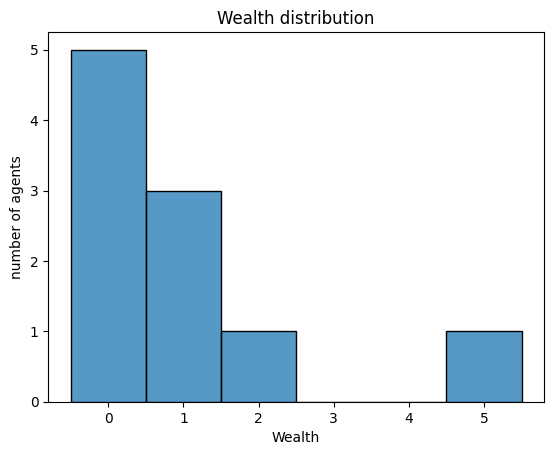

In [29]:
agent_wealth = [a.wealth for a in model.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="number of agents"
);  # The semicolon is just to avoid printing the object representation

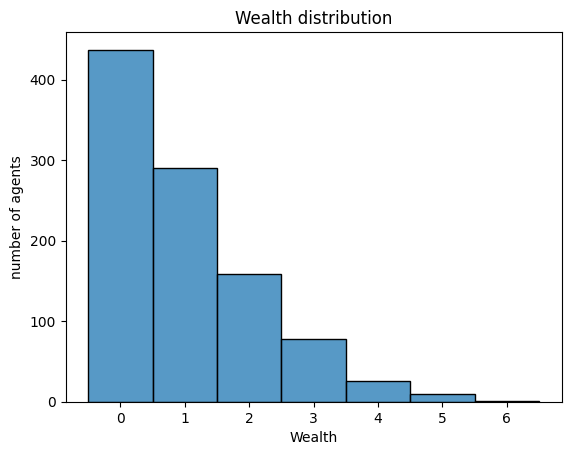

In [30]:
all_wealth = []
# This runs the model 100 times, each model executing 30 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");